# Tutorial SVM

In [ ]:
#Librerias Importadas para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Inclución de la base de datos mediante el link al arcghivo txt en formato csv
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
nom_col = ["variance", "skewness", "curtosis", "entropy", "class"]

datos = pd.read_csv(link, names=nom_col, sep=",", header=None)
datos.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
#Etiquetas para la predicción
datos['class'].unique()

array([0, 1])

In [ ]:
#Cantidad de Datos y categorias respectivamente
datos.shape

(1372, 5)

In [ ]:
#Proporcion de datos con cada una de las etiquetas a clasificar
datos['class'].value_counts(normalize=True)

,proportion
class,
0,0.555394
1,0.444606


<Axes: ylabel='Frequency'>

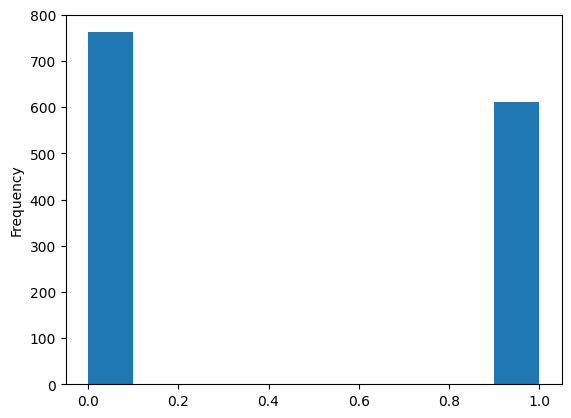

In [ ]:
#Gráfica de la frecuencia de cadauna de las etiquetas
datos['class'].plot.hist()

In [ ]:
#estadísticas de los datos
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


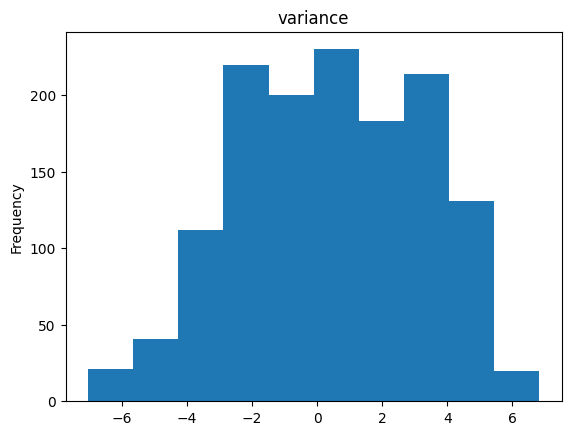

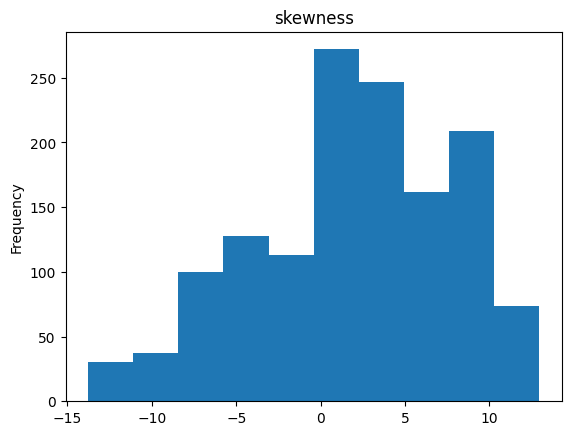

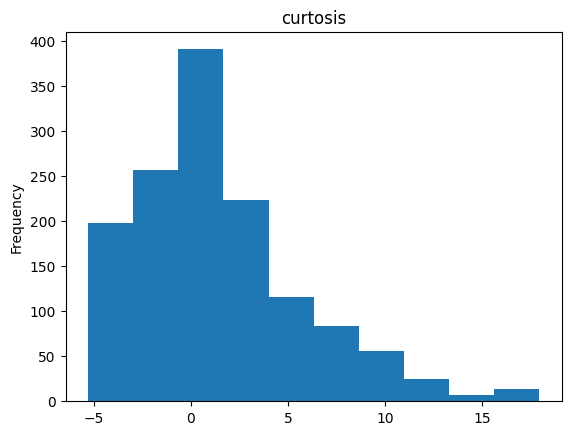

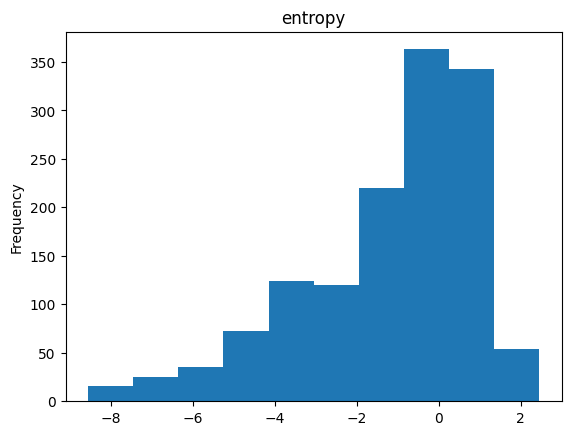

In [ ]:
#Gráficas de la distribución y magnitud de las categorías de cada dato
import matplotlib.pyplot as plt

for col in datos.columns[:-1]:
    plt.title(col)
    datos[col].plot.hist()
    plt.show()

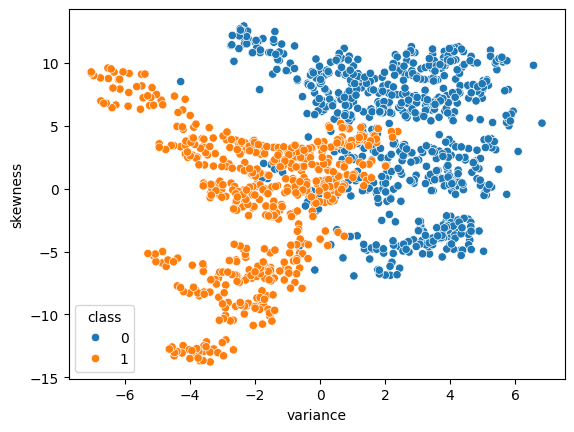

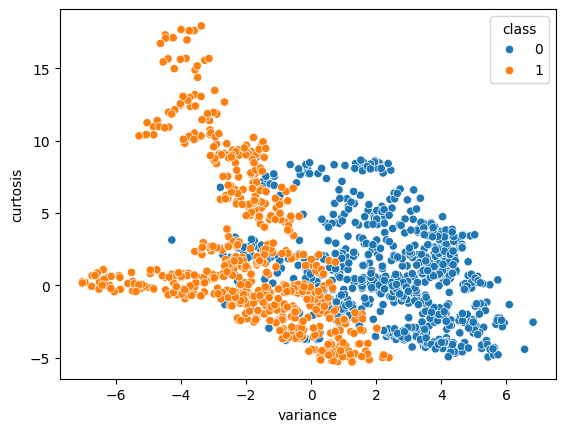

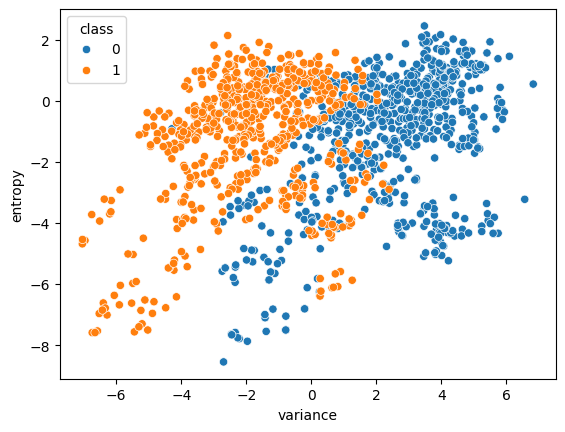

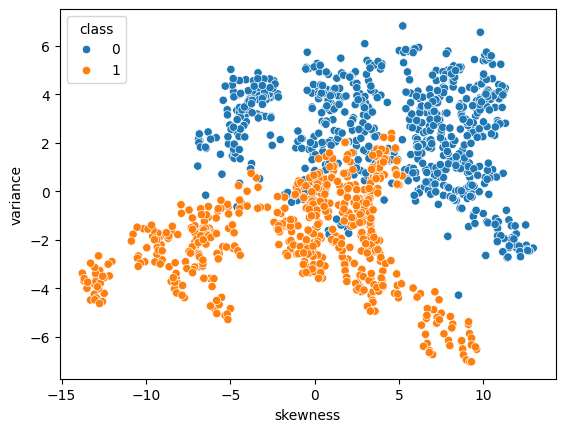

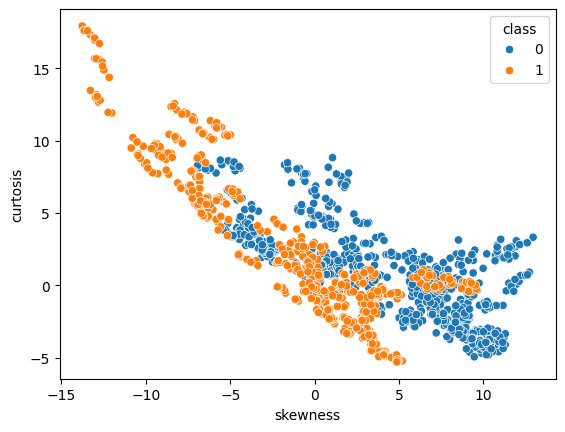

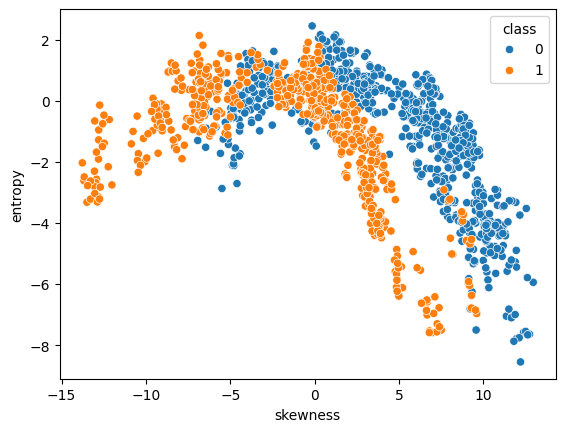

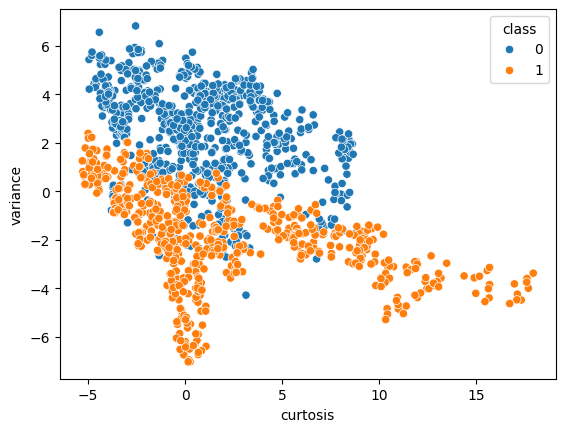

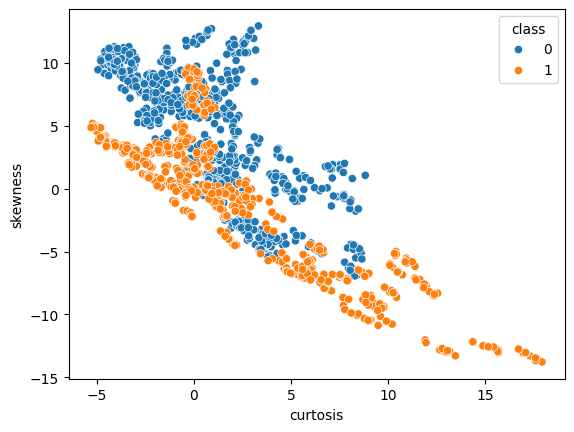

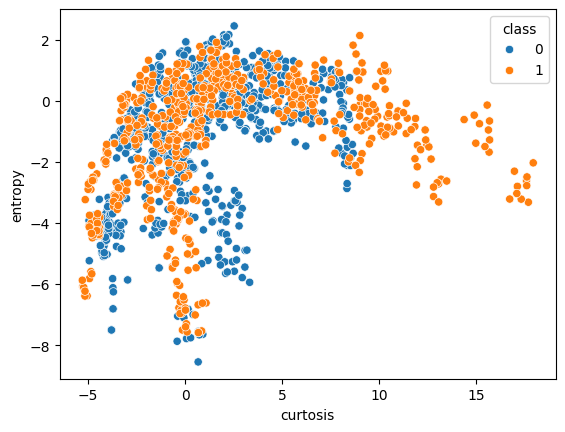

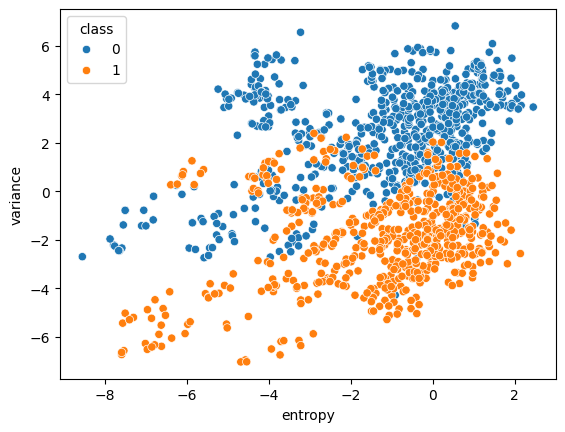

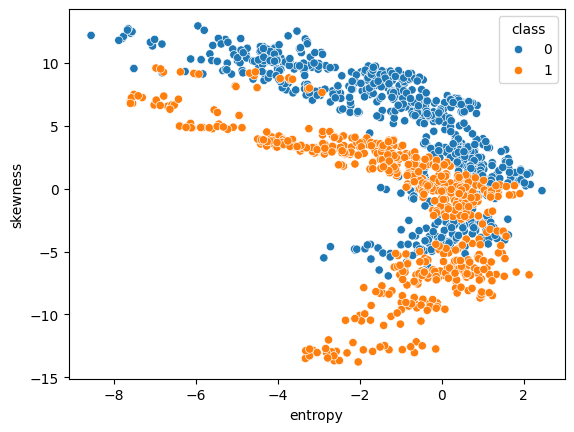

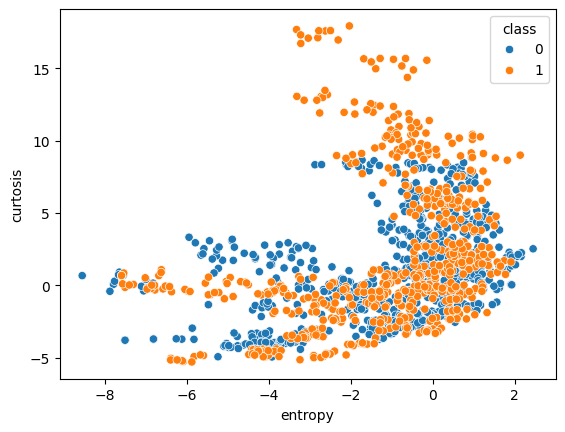

In [ ]:
import seaborn as sns

for feature_1 in datos.columns[:-1]:
    for feature_2 in datos.columns[:-1]:
        if feature_1 != feature_2:
            sns.scatterplot(x=feature_1, y=feature_2, data=datos, hue='class')
            plt.show()
#

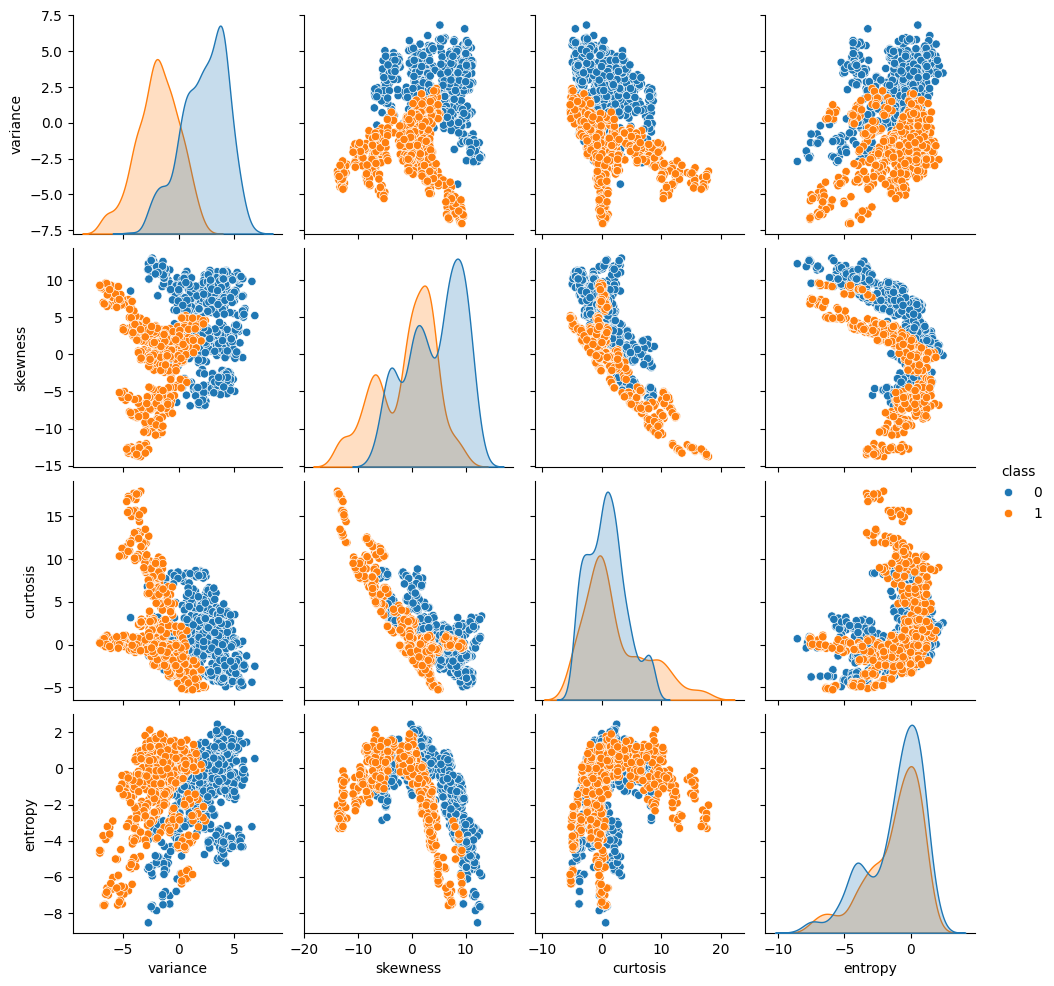

In [ ]:
#Gráficas de la distribución y magnitud de las categorías de cada dato con Seaborn segun su clasificación
sns.pairplot(datos, hue='class')

In [ ]:
y = datos['class']
X = datos.drop('class', axis=1)
# Asignación de las variables dependientes e Independientes

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
#Division del modelo para los datos de entrenamiento y prueva

In [ ]:
xtrain_samples = x_train.shape[0]
xtest_samples = x_test.shape[0]

print(f'xtrain samples: {xtrain_samples}')
print(f'xtest samples: {xtest_samples}')
#Cantidad de datos asignados a cada grupo

xtrain samples: 1097
xtest samples: 275


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(x_test)
#Prediccón con el modelo

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



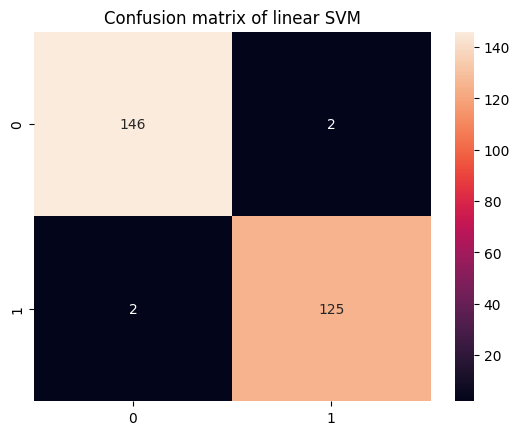

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM')

print(classification_report(y_test, y_pred))
#Evaluación de la eficacia del modelo con el conjunto de prueba

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.98      0.99      0.99       483

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



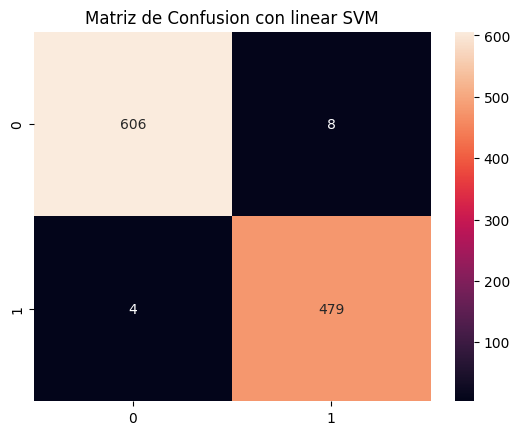

In [ ]:
y_pred_train = svc.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Matriz de Confusion con linear SVM')

print(classification_report(y_train, y_pred_train))
#Evaluación de la eficacia del modelo con el conjunto de entrenamiento

# Análisis Con Kernel Gausiano (rbf)


In [ ]:
new_svc = SVC(kernel = 'rbf')
#Nuevo modelo con el Kernel Gaussiano

In [ ]:
new_svc.fit(x_train, y_train)
#Entrenamiento del Modelo

SVC()

In [ ]:
new_y_pred = new_svc.predict(x_test)
#redicciones de el modelo con los datos de prueba

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



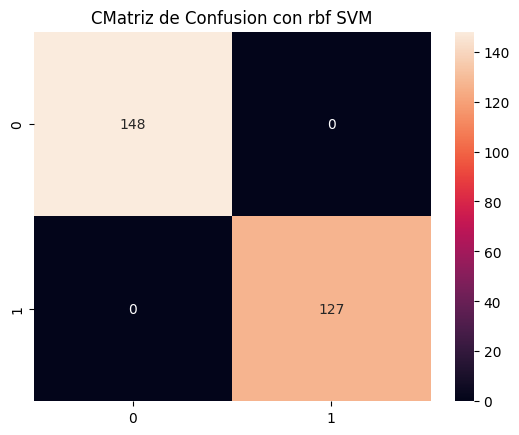

In [ ]:
new_cm = confusion_matrix(y_test, new_y_pred)
sns.heatmap(new_cm, annot=True, fmt='d').set_title('CMatriz de Confusion con rbf SVM')

print(classification_report(y_test, new_y_pred))
#Evaluación de la eficacia del nuevo modelo con el conjunto de prueba

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       614
           1       0.99      1.00      0.99       483

    accuracy                           1.00      1097
   macro avg       0.99      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



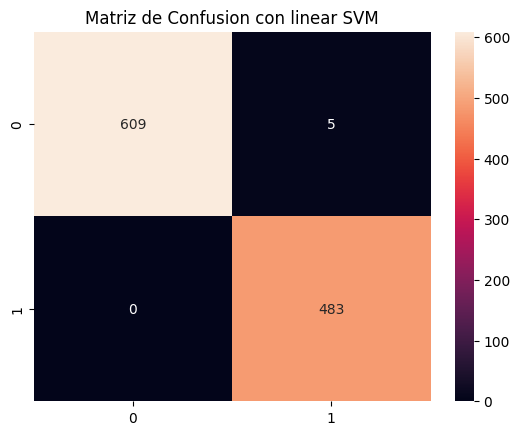

In [ ]:
new_y_pred_train = new_svc.predict(x_train)
cm_train = confusion_matrix(y_train, new_y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Matriz de Confusion con linear SVM')

print(classification_report(y_train, new_y_pred_train))
#Evaluación de la eficacia del nuevo modelo con el conjunto de entrenamiento

## Comparación

Los resultados en ambos casos son bastante buenos considerando que la precision es mayor a el 98% en ambos casos. No obstante con los mismos datos y modelo el Kenel Gaussiano presenta resultados superiores con una presicion y metrica recall de 100% y 99% respectivamente considerando la dificultad plamteada en el tutorial donde en multiples occaciones los datos de distintas categorias se sobreponen en alguna o multiples categorias, este desempeño es excelente por lo cual se puede confirmar que para tareas de clasificación mediante el modelo SVC, el kernel Gaussiano es una excelente opción.